# Data Cleaning
In order to start, we need to ensure the data is relevant and usable.

In [2]:
#Importing Libraries
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import serial
import time
import schedule

First, we want to have a preliminary look at the data.

In [3]:
df = pd.read_csv("PowerGenerationData.csv")
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [4]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [6]:
print(df['Location'].unique())
print()
print(df['Season'].unique())

['Camp Murray' 'Grissom' 'Hill Weber' 'JDMT' 'Kahului' 'Malmstrom'
 'March AFB' 'MNANG' 'Offutt' 'Peterson' 'Travis' 'USAFA']

['Winter' 'Spring' 'Summer' 'Fall']


### Correlation Matrix Heatmap

<AxesSubplot:>

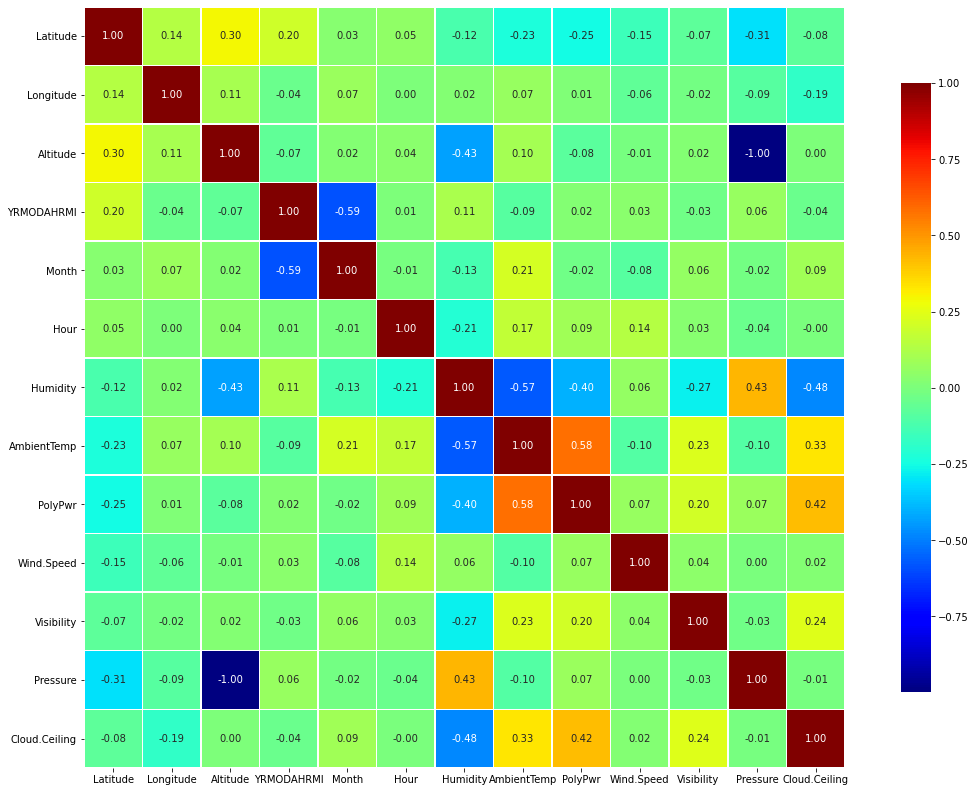

In [7]:
corr = df.drop(['Date', 'Time'], axis=1).corr()
plt.subplots(figsize=(20, 14))
sb.heatmap(corr, cmap='jet', center=0, annot=True, fmt='.2f',
           square=True, linewidths=.5, cbar_kws={"shrink": .8})

Since time is measured in 24Hr format and month by (1-12), we have to convert them to Sine to ensure that the algorithm knows that 0000 and 2359 are adjacent to each other instead of being far apart. Same for months.

In [8]:
df['SineMonth'] = df['Month'].apply(lambda x: np.sin(2*np.pi*(x+9)/12))
df['SineHour'] = df['Hour'].apply(lambda x: np.sin(2*np.pi*(x+18)/24))

### One-hot encoding for categorical variables

In [9]:
df = pd.get_dummies(df, columns=['Location', 'Season'], drop_first=False)

In [10]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Altitude', 'YRMODAHRMI',
       'Month', 'Hour', 'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed',
       'Visibility', 'Pressure', 'Cloud.Ceiling', 'SineMonth', 'SineHour',
       'Location_Camp Murray', 'Location_Grissom', 'Location_Hill Weber',
       'Location_JDMT', 'Location_Kahului', 'Location_MNANG',
       'Location_Malmstrom', 'Location_March AFB', 'Location_Offutt',
       'Location_Peterson', 'Location_Travis', 'Location_USAFA', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

# Machine Learning

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [12]:
X = df.loc[:, ~df.columns.isin(['Date', 'Time', 'YRMODAHRMI', 'Month', 'Hour', 'PolyPwr'])]
y = df['PolyPwr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

### Standardize dataset
Necessary to standardize since magnitudes of X features vary greatly

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression


In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_r_sq = reg.score(X_test, y_test)
reg_y_pred = reg.predict(X_test)

Text(25, 2, 'R^2 = 0.5625')

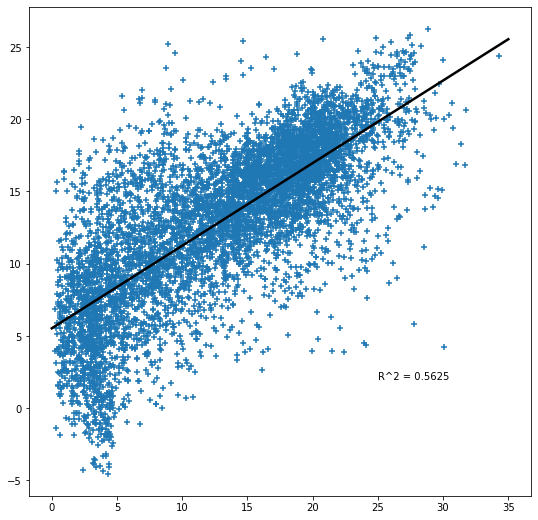

In [24]:
fig, ax = plt.subplots(figsize=(9,9))
ax.scatter(y_test, reg_y_pred, marker='+')

b, a = np.polyfit(y_test, reg_y_pred, 1)
xseq = np.linspace(0, 35, 100)

ax.plot(xseq, a + b*xseq, color='k', lw=2.5)
ax.text(25, 2, 'R^2 = {0:.4g}'.format(float(reg_r_sq)))

In [25]:
print("RMSE = {}".format(np.sqrt(mean_squared_error(y_test, reg_y_pred))))

RMSE = 4.729423863174825


In [26]:
X.columns

Index(['Latitude', 'Longitude', 'Altitude', 'Humidity', 'AmbientTemp',
       'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'SineMonth',
       'SineHour', 'Location_Camp Murray', 'Location_Grissom',
       'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
       'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
       'Location_Offutt', 'Location_Peterson', 'Location_Travis',
       'Location_USAFA', 'Season_Fall', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

### Coefficients of Linear Regression Model

In [27]:
reg.coef_

array([-4.34804192e+13, -2.06946954e+13,  1.61908875e+13, -1.79839760e+00,
        1.89539055e+00,  5.54752617e-01,  5.56780085e-02,  3.64638797e+00,
        1.48435506e+00,  1.70982844e+00,  9.42693507e-01,  1.93250215e+13,
        2.18247973e+13,  1.01883355e+13,  1.00242491e+12, -2.79951586e+13,
        1.98738515e+13,  2.14642231e+13, -1.58819724e+12,  1.47013648e+13,
        4.90611530e+12,  9.61933524e+12,  4.64430881e+12, -1.56543748e+12,
       -1.60357348e+12, -1.87417349e+12, -1.45105224e+12])

# Neural Network

In [28]:
regr = MLPRegressor(solver='lbfgs', activation='relu', learning_rate='adaptive', verbose=True,
                    hidden_layer_sizes=(24, 12), 
                    random_state=1, max_iter=15000).fit(X_train, y_train)

nn_y_pred_1 = regr.predict(X_test)

In [29]:
with pd.option_context('display.max_rows', None):
    display(pd.DataFrame({'y_test': y_test, 'y_pred': nn_y_pred_1}))


,y_test,y_pred
13060,15.73394,14.296464
9909,5.54791,5.638789
16300,12.84546,11.763953
10949,20.33438,19.986194
4344,25.26033,13.523424
6371,7.87716,20.831908
21039,11.52955,9.835357
18351,12.72732,12.866208
8295,3.69410,9.686589
875,17.27889,14.565390


Text(25, 2, 'R^2 = 0.6428')

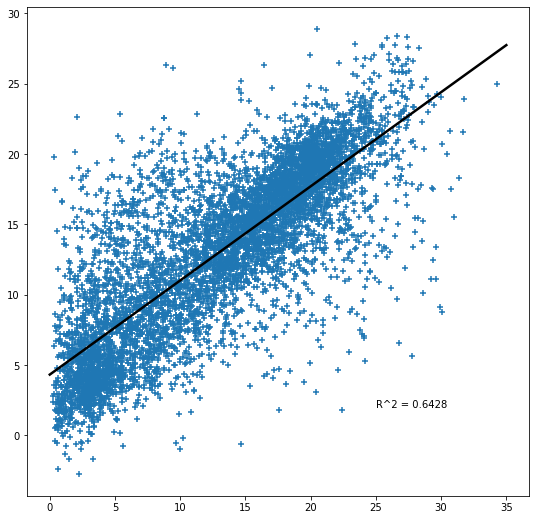

In [30]:
r_sq = regr.score(X_test, y_test)

fig, ax = plt.subplots(figsize=(9,9))
ax.scatter(y_test, nn_y_pred_1, marker='+')

b, a = np.polyfit(y_test, nn_y_pred_1, 1)
xseq = np.linspace(0, 35, 100)

ax.plot(xseq, a + b*xseq, color='k', lw=2.5)
ax.text(25, 2, 'R^2 = {0:.4g}'.format(float(r_sq)))


In [31]:
print("RMSE = {}".format(np.sqrt(mean_squared_error(y_test, nn_y_pred_1))))

RMSE = 4.2731646130769025


## Neural Network with Dropout layers

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend

In [33]:
def custom_loss(y_true, y_pred):
    SS_res = backend.sum(backend.square(y_true-y_pred))
    SS_tot = backend.sum(backend.square(y_true-backend.mean(y_true)))
    return SS_res/(SS_tot+backend.epsilon())

In [34]:
def r_squared(y_true, y_pred):
    SS_res = backend.sum(backend.square(y_true-y_pred))
    SS_tot = backend.sum(backend.square(y_true-backend.mean(y_true)))
    return (1-SS_res/(SS_tot+backend.epsilon()))

In [35]:
model = keras.Sequential()
model.add(layers.Dense(320, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(), input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(160, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotUniform()))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(72, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform()))
model.add(layers.Dense(1, activation='relu'))
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanAbsolutePercentageError(), r_squared], 
              loss=custom_loss)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 320)               8960      
_________________________________________________________________
dropout (Dropout)            (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               51360     
_________________________________________________________________
dropout_1 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 72)                11592     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 73        
Total params: 71,985
Trainable params: 71,985
Non-trainable params: 0
____________________________________________________

In [36]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

model.fit(X_train, y_train, batch_size=256, epochs=75, validation_split=0.15)

Epoch 1/75
49/49 [==============================] - 1s 5ms/step - loss: 1.1614 - root_mean_squared_error: 7.7113 - mean_absolute_error: 5.9086 - mean_absolute_percentage_error: 92.7092 - r_squared: -0.1600 - val_loss: 0.4581 - val_root_mean_squared_error: 4.7122 - val_mean_absolute_error: 3.5299 - val_mean_absolute_percentage_error: 61.7862 - val_r_squared: 0.5413
Epoch 2/75
49/49 [==============================] - 0s 2ms/step - loss: 0.4425 - root_mean_squared_error: 4.7342 - mean_absolute_error: 3.5510 - mean_absolute_percentage_error: 61.6991 - r_squared: 0.5577 - val_loss: 0.4151 - val_root_mean_squared_error: 4.4869 - val_mean_absolute_error: 3.3333 - val_mean_absolute_percentage_error: 53.4139 - val_r_squared: 0.5844
Epoch 3/75
49/49 [==============================] - 0s 2ms/step - loss: 0.4143 - root_mean_squared_error: 4.5804 - mean_absolute_error: 3.3932 - mean_absolute_percentage_error: 58.2690 - r_squared: 0.5858 - val_loss: 0.3999 - val_root_mean_squared_error: 4.4039 - val

49/49 [==============================] - 0s 2ms/step - loss: 0.3519 - root_mean_squared_error: 4.2218 - mean_absolute_error: 3.0075 - mean_absolute_percentage_error: 51.2846 - r_squared: 0.6482 - val_loss: 0.3587 - val_root_mean_squared_error: 4.1713 - val_mean_absolute_error: 2.8930 - val_mean_absolute_percentage_error: 48.3780 - val_r_squared: 0.6418
Epoch 24/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3543 - root_mean_squared_error: 4.2361 - mean_absolute_error: 3.0142 - mean_absolute_percentage_error: 51.4178 - r_squared: 0.6457 - val_loss: 0.3640 - val_root_mean_squared_error: 4.2024 - val_mean_absolute_error: 2.9877 - val_mean_absolute_percentage_error: 47.1502 - val_r_squared: 0.6363
Epoch 25/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3556 - root_mean_squared_error: 4.2368 - mean_absolute_error: 3.0255 - mean_absolute_percentage_error: 52.0614 - r_squared: 0.6443 - val_loss: 0.3594 - val_root_mean_squared_error: 4.1751 - val_mean_abso

49/49 [==============================] - 0s 2ms/step - loss: 0.3360 - root_mean_squared_error: 4.1267 - mean_absolute_error: 2.9123 - mean_absolute_percentage_error: 49.3667 - r_squared: 0.6640 - val_loss: 0.3516 - val_root_mean_squared_error: 4.1284 - val_mean_absolute_error: 2.8161 - val_mean_absolute_percentage_error: 45.4089 - val_r_squared: 0.6493
Epoch 46/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3392 - root_mean_squared_error: 4.1468 - mean_absolute_error: 2.9389 - mean_absolute_percentage_error: 49.4300 - r_squared: 0.6607 - val_loss: 0.3488 - val_root_mean_squared_error: 4.1122 - val_mean_absolute_error: 2.8334 - val_mean_absolute_percentage_error: 44.8003 - val_r_squared: 0.6523
Epoch 47/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3354 - root_mean_squared_error: 4.1201 - mean_absolute_error: 2.9155 - mean_absolute_percentage_error: 49.0238 - r_squared: 0.6646 - val_loss: 0.3491 - val_root_mean_squared_error: 4.1143 - val_mean_abso

49/49 [==============================] - 0s 2ms/step - loss: 0.3268 - root_mean_squared_error: 4.0638 - mean_absolute_error: 2.8685 - mean_absolute_percentage_error: 47.3786 - r_squared: 0.6731 - val_loss: 0.3547 - val_root_mean_squared_error: 4.1468 - val_mean_absolute_error: 2.8984 - val_mean_absolute_percentage_error: 43.0282 - val_r_squared: 0.6467
Epoch 68/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3268 - root_mean_squared_error: 4.0607 - mean_absolute_error: 2.8545 - mean_absolute_percentage_error: 47.7160 - r_squared: 0.6731 - val_loss: 0.3507 - val_root_mean_squared_error: 4.1234 - val_mean_absolute_error: 2.9018 - val_mean_absolute_percentage_error: 47.0527 - val_r_squared: 0.6501
Epoch 69/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3201 - root_mean_squared_error: 4.0258 - mean_absolute_error: 2.8334 - mean_absolute_percentage_error: 46.9439 - r_squared: 0.6798 - val_loss: 0.3529 - val_root_mean_squared_error: 4.1365 - val_mean_abso

In [37]:
model.evaluate(X_test, y_test)

198/198 [==============================] - 0s 588us/step - loss: 0.3633 - root_mean_squared_error: 4.2126 - mean_absolute_error: 2.8976 - mean_absolute_percentage_error: 52.2000 - r_squared: 0.6366


[0.36330845952033997,
 4.21263313293457,
 2.897552251815796,
 52.19999313354492,
 0.636612057685852]

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=15, random_state=1)
rfr.fit(X_train, y_train)

rf_y_pred = rfr.predict(X_test)

Text(27, 4, 'R^2 = 0.6527')

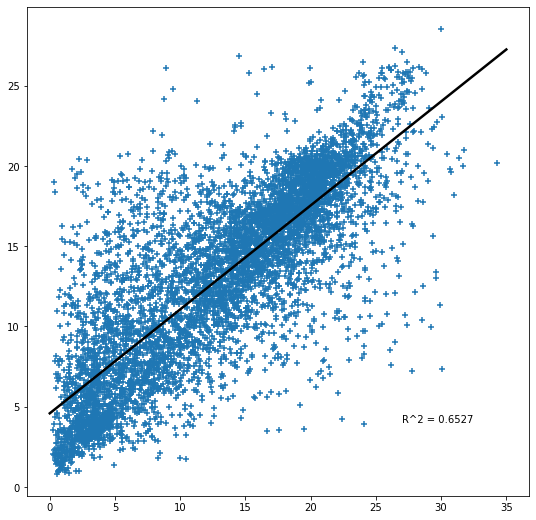

In [39]:
rfr_r_sq = rfr.score(X_test, y_test)

fig, ax = plt.subplots(figsize=(9,9))
ax.scatter(y_test, rf_y_pred, marker='+')

b, a = np.polyfit(y_test, rf_y_pred, 1)
xseq = np.linspace(0, 35, 100)

ax.plot(xseq, a + b*xseq, color='k', lw=2.5)
ax.text(27, 4, 'R^2 = {0:.4g}'.format(float(rfr_r_sq)))


In [40]:
print("RMSE = {}".format(np.sqrt(mean_squared_error(y_test, rf_y_pred))))

RMSE = 4.213888599852581


# Arduino Integration
1) Receive real-time temperature, humidity and light intensity data from Arduino sensors<br>
2) Neural Network forecasts solar power generation over next hour<br>
3) Display predictions on Arduino LCD

In [41]:
# predict solar power generation based on Arduino sensor readings on humidity, temperature and light intensity
# other X features follow that of benchmark row #3281
def RT_predict(humidity, temp, light, model):
    X_demo = X.iloc[3281]
    X_demo[3] = humidity
    X_demo[4] = temp
    # scale light intensity (0-1000) down to (0-10)
    X_demo[6] = light/100

    return model.predict(scaler.transform(np.array([X_demo])))

In [44]:
# Arduino sensor readings:
# 1) Temperature
# 2) Humidity
# 3) Light intensity
def arduino_func():
    
    arduino_data = arduino.readline()
    decoded_values = str(arduino_data[0:len(arduino_data)].decode("utf-8"))
    list_values = decoded_values.split('x')
    
    for item in list_values:
        list_in_floats.append(float(item))
    
    print(f'Collected reading from Arduino: {list_in_floats}')
    
    
    if len(list_in_floats) == 3:
        x = RT_predict(list_in_floats[2],list_in_floats[0],list_in_floats[1],regr)[0]
        arduino.write(str(x).encode())
        
        print("Model prediction:", x) 
        print()
    
    arduino_data = 0
    list_in_floats.clear()
    list_values.clear()
   # arduino.close()

In [48]:
import warnings
warnings.filterwarnings("ignore")

# Arduino to Python, Python to Arduino Data Transfer

In [49]:
list_values = []
list_in_floats = []
print("Program started")
arduino = serial.Serial('/dev/cu.usbserial-14220', 9600)


while True:
    arduino_func()
    time.sleep(1)

Program started
Collected reading from Arduino: [29.0, 325.0, 77.0]
Model prediction: 5.693303015063615

Collected reading from Arduino: [29.0, 324.0, 77.0]
Model prediction: 5.695548428693634

Collected reading from Arduino: [29.0, 324.0, 77.0]
Model prediction: 5.695548428693634

Collected reading from Arduino: [29.0, 324.0, 77.0]
Model prediction: 5.695548428693634

Collected reading from Arduino: [29.0, 324.0, 76.0]
Model prediction: 5.656606985428146



KeyboardInterrupt: 